In [7]:
import os
import numpy as np
np.set_printoptions(threshold='nan')

TypeError: threshold must be numeric

In [2]:
GMBDATA = '/BrainSeg/Classify_Results/GMBData/'
files = sorted(os.listdir(GMBDATA))
# files[1].split('.')[0][-1]
value_files = []
for value_file in files:
    if value_file.split('.')[0][-1] == 'e':
        value_files.append(value_file)
print(len(value_files))
print(value_files[1])

30
NA4077-02_ABvalue.npy


In [6]:
v = np.load(GMBDATA + files[0])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
value = np.load(GMBDATA + value_files[0])


In [28]:
value[200,190,:]

array([254,   3, 254], dtype=uint8)

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 200
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [34]:
import pyvips
import os
WSI_ADDR = '/BrainSeg/norm_png/'

format_to_dtype = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}
# vips image to numpy array
def vips2numpy(vi):
    return np.ndarray(buffer=vi.write_to_memory(),
                      dtype=format_to_dtype[vi.format],
                      shape=[vi.height, vi.width, vi.bands])

In [97]:
wsi_names = sorted(os.listdir(WSI_ADDR))
wsi = pyvips.Image.new_from_file(WSI_ADDR + wsi_names[23])
print('wsi shape: ', wsi.width, wsi.height)
wsi_patch = wsi.extract_area(10240,10240,25240,25240)
# wsi_patch = wsi.resize(0.01)
tile = vips2numpy(wsi_patch)
tile.shape


wsi shape:  61752 38443


(25240, 25240, 3)

SLIC number of segments: 62


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


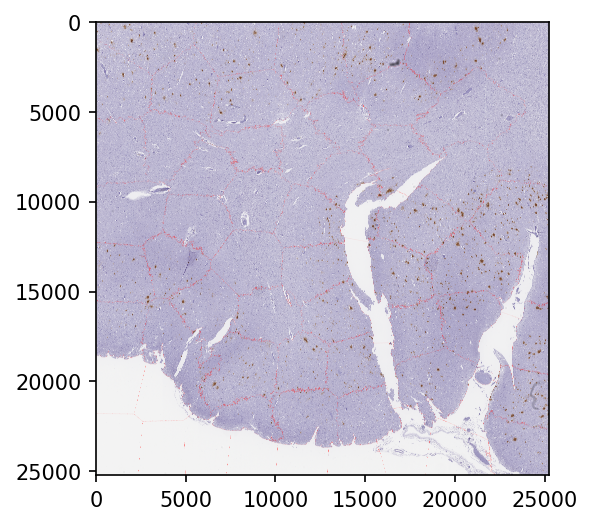

In [98]:
# img = img_as_float(astronaut())
# print(astronaut().shape)
# print(astronaut().shape)
img = img_as_float(tile)
segments_slic = slic(img, n_segments=100, compactness=10, sigma=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
plt.imshow(mark_boundaries(img, segments_slic, color=(255, 0, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


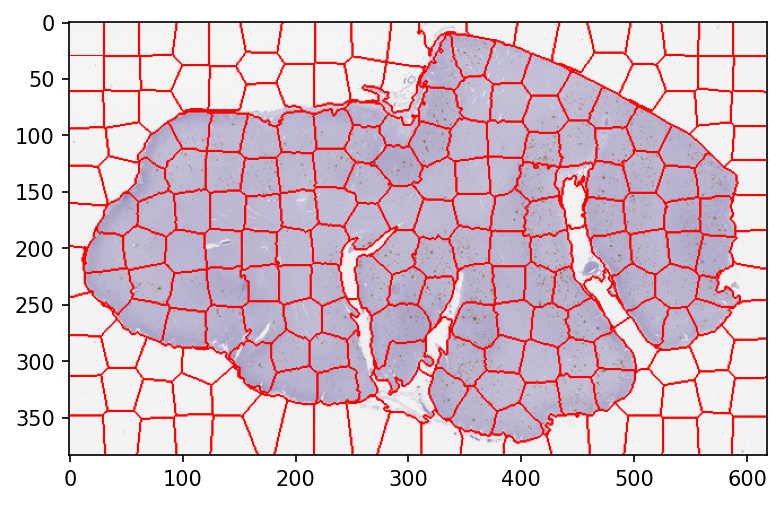

In [93]:
plt.imshow(mark_boundaries(img, segments_slic, color=(255, 0, 0)))
plt.show()

Felzenszwalb number of segments: 318850
SLIC number of segments: 138
Quickshift number of segments: 593010


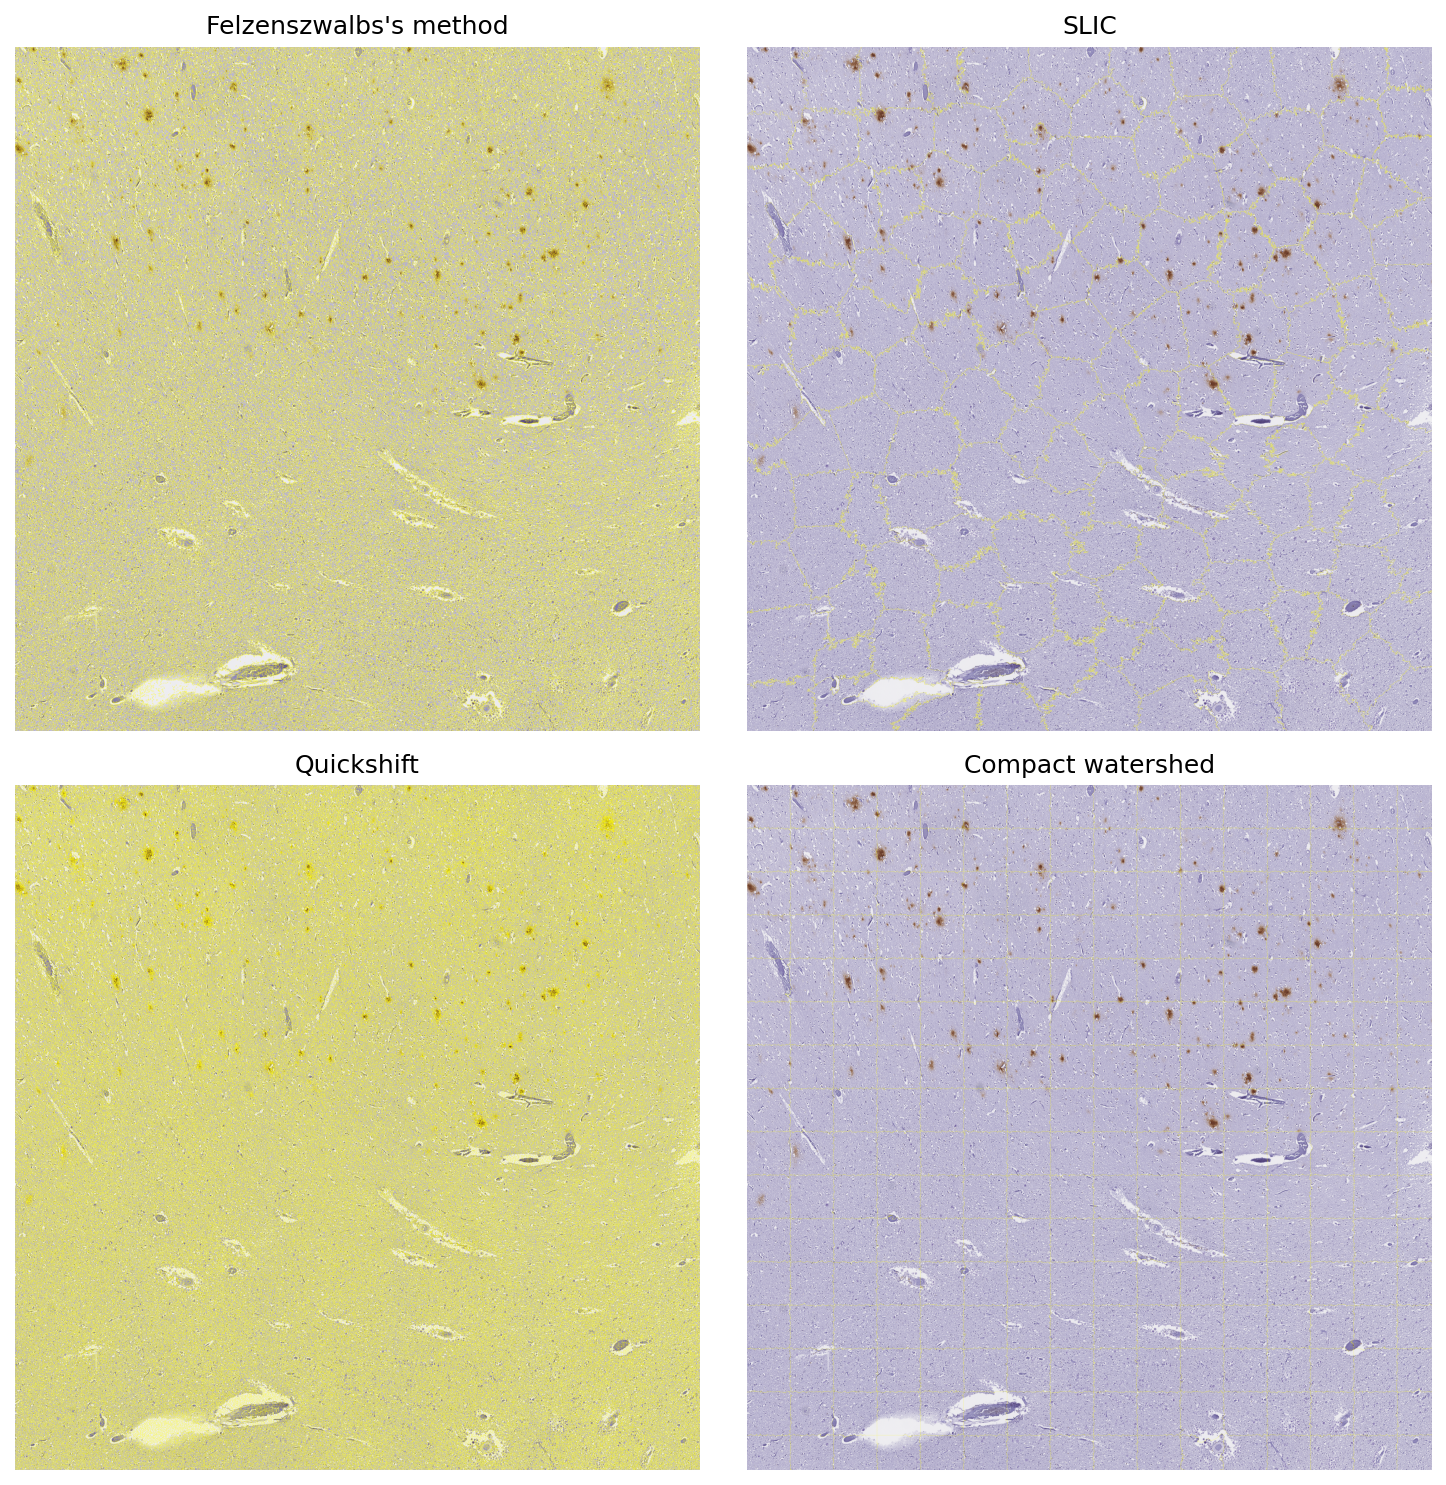

In [94]:

img = tile
segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()